# 12	Regression mehrdimensionaler Datensätze
# 12.1	Ausbeute eines chemischen Prozesses

a) Die Daten werden eingelesen. Mithilfe des Befehls "ols" wird eine Regressionsfunktion für ein lineares Modell mit Wechselwirkungen berechnet und das Ergebnis grafisch dargestellt. 


In [1]:
import scipy
from scipy import io
from scipy import stats
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
""" Laden der Daten"""
data =scipy.io.loadmat('ChemischeAusbeute.mat')['data']

T=data[:,0]
K=data[:,1]
A=data[:,2]


In [2]:
''' Statistische Bewertung '''
'''"""[0 0; 1 0; 0 1; 1 1] Lineares Modell mit Wechselwirkungen anlegen""" '''
# Model: Aplot = b(1) + b(2)*T + b(3)*K + b(4)*T*K
data_Dic={'X':T, 'Y':K , 'Z':A}

model1 = ols("Z ~ X + Y+ X*Y", data_Dic).fit()
print(model1.summary())
beta1=list(model1._results.params)
b1,b2,b3,b4=beta1

                            OLS Regression Results                            
Dep. Variable:                      Z   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     509.4
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           4.42e-16
Time:                        16:54:08   Log-Likelihood:                -29.371
No. Observations:                  20   AIC:                             66.74
Df Residuals:                      16   BIC:                             70.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9869      6.903      1.012      0.3

ergibt sich folgende Darstellung:


Text(0.5, 0, 'Ausbeute A / %')

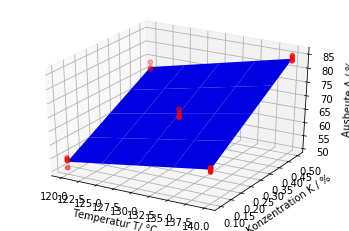

In [3]:

'''% Regressionsfunktion als Grid berechnen'''
tplot= np.arange(120,145,5)
kplot=np.arange(0.1,0.6,0.1)
[Tplot,Kplot] = np.meshgrid(tplot, kplot)
Aplot= b1 + b2*Tplot + b3*Kplot + b4*Tplot*Kplot

print ('ergibt sich folgende Darstellung:')

'''Grafische Darstellung'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(T, K, A ,c='r', marker='o')
ax.plot_surface(Tplot,Kplot,Aplot,color='b')
ax.set_xlabel('Temperatur T/ °C') 
ax.set_ylabel('Konzentration K / %') 
ax.set_zlabel('Ausbeute A / %')  


b) Die Residuen ergeben sich aus der Abweichung von Messwert zu Regressionswert. 

Text(0, 0.5, 'Ausbeute A / %')

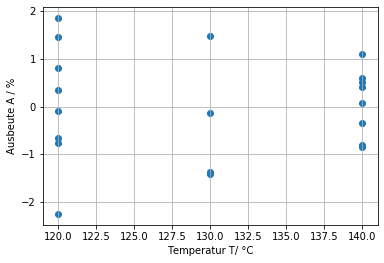

In [4]:
res1=model1.resid

%matplotlib inline
plt.scatter(T,res1)
plt.grid(True)
plt.xlabel('Temperatur T/ °C')
plt.ylabel('Residuen Ausbeute A / %')

Text(0, 0.5, 'Residuen Ausbeute A / %')

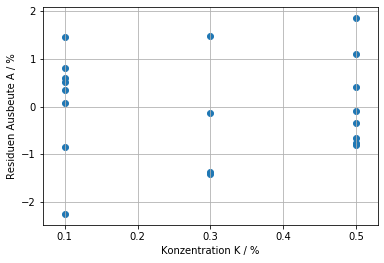

In [12]:
plt.scatter(K,res1)
plt.grid(True)
plt.xlabel('Konzentration K / %')
plt.ylabel('Residuen Ausbeute A / %')

Es ist keine Struktur der Reststreuung zu erkennen, die auf einen systematischen Regressionsfehler schließen lässt.

c) Zur Bewertung der Güte wird das adjungierte Bestimmtheitsmaß herangezogen.

Es beträgt RADJ = 0.9877 ~ 0.988, was auf eine sehr gute Regression hinweist. Die Residuen lassen, wie in Aufgabenteil b festgestellt, keinen strukturierten Fehler erkennen. Der t-Test zeigt, dass nicht alle Terme signifikant sind, deshalb wird in der folgende Teilaufgabe eine Reduktion der Regressionsterme vorgenommen.


d) Ausgehend von dem linearen Modell mit Wechselwirkungen werden nicht signifikante Terme eliminiert.

In [6]:
''' Reduktion des Modells'''

'''model = [0 0; 1 0; 1 1]; Lineares Modell mit Wechselwirkungen anlegen'''
# Model: Aplot = b(1) + b(2)*T + b(4)*T*K
data_Dic={'X':T, 'Y':K*T , 'Z':A}

model2 = ols("Z ~ X + Y ", data_Dic).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                      Z   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     789.6
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.71e-17
Time:                        16:54:09   Log-Likelihood:                -29.645
No. Observations:                  20   AIC:                             65.29
Df Residuals:                      17   BIC:                             68.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1581      3.764      0.839      0.4

Durch die Reduktion des Regressionsmodells steigt das adjungierte Bestimmtheitsmaß von RADJ = 0.9877 geringfügig auf 
RADJ = 0.9883 ~ 0.988 an. Anschließend sind alle Terme signifikant.


In [7]:
''' Reduktion des Modells'''

'''"""model = [0 0; 1 0; 1 1]; Lineares Modell mit Wechselwirkungen anlegen""" '''
# Model: Aplot =  b(2)*T + b(4)*T.*Kplot
data_Dic={'X':T, 'Y':K*T , 'Z':A}

model3 = ols("Z ~ 0+X + Y ", data_Dic).fit()
print(model3.summary())


                                 OLS Regression Results                                
Dep. Variable:                      Z   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.560e+04
Date:                Sat, 04 Jan 2020   Prob (F-statistic):                    4.21e-33
Time:                        16:54:09   Log-Likelihood:                         -30.050
No. Observations:                  20   AIC:                                      64.10
Df Residuals:                      18   BIC:                                      66.09
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Durch die Reduktion des Regressionsmodells steigt das adjungierte Bestimmtheitsmaß von RADJ = 0.9883~ 0.988 geringfügig auf RADJ = 0.998 ~ 1 an. Anschließend sind alle Terme signifikant.

e) Mit den hergeleiteten Gleichungen wird das Konfidenzintervall berechnet.

In [8]:
from scipy.stats import t   
b=model3._results.params 
r=model3.resid

'''Berechnung des Konfidenzbereichs'''
PSI = np.linalg.inv((np.array([T,T*K])).dot(np.array([T,T*K]).T))
FG = (len(T) - len(b))
Sr = np.sqrt(1/FG*r.dot(r.T))

Amin=np.zeros((len(Tplot), len(Kplot)))
Amax=np.zeros((len(Tplot), len(Kplot)))

for n in range(0,len(Tplot)):
    for m in range(0,len(Kplot)):
        x0 = np.array([Tplot[n,m], Tplot[n,m]*Kplot[n,m]])
        Amin[n,m] = b.dot(x0) - t.ppf(0.975,FG)*Sr*np.sqrt(x0.dot(PSI).dot(x0))
        Amax[n,m] = b.dot(x0) - t.ppf(0.025,FG)*Sr*np.sqrt(x0.dot(PSI).dot(x0))
    
  
Aplot = b[0]*Tplot + b[1]*Tplot*Kplot

Es ergibt sich folgende Darstellung.


Text(0.5, 0, 'Ausbeute A / %')

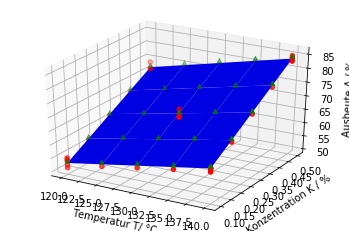

In [9]:

print('Es ergibt sich folgende Darstellung.')
'''Grafische Darstellung'''
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(T, K, A ,c='r', marker='o')
ax1.scatter(Tplot.reshape(25),Kplot.reshape(25),Amin.reshape(25),c='r', marker='o')
ax1.scatter(Tplot.reshape(25),Kplot.reshape(25),Amax.reshape(25),c='g', marker='^')
ax1.plot_surface(Tplot,Kplot,Aplot,color='b')
ax1.set_xlabel('Temperatur T/ °C') 
ax1.set_ylabel('Konzentration K / %') 
ax1.set_zlabel('Ausbeute A / %')  

f) Die Länge des 95 % - Prognosebereichs für zukünftige Stichprobenwerte bei einer Temperatur 
T = 125 °C und einer Konzentration K = 0.4 % berechnet sich mit folgendem Python-Code:


In [10]:
''' Berechnung Prognoseintervall'''
xp0 = np.array([125,125*0.4])
APmin = b.dot(xp0) - t.ppf(0.975,FG)*Sr*np.sqrt(1+(xp0.dot(PSI).dot(xp0)))
APmax = b.dot(xp0) - t.ppf(0.025,FG)*Sr*np.sqrt(1+(xp0.dot(PSI).dot(xp0)))

APmin, APmax


(67.4677258665032, 72.42615025505859)

Es ergibt sich eine Ausbeute, die zwischen 67.4677 und 72.4262 % liegt.